In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("10000 BT Records.csv")

In [3]:
data["Deposits"]=pd.to_numeric(data["Deposits"].str.replace(",",""), errors="coerce")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10000 non-null  object 
 1   Description  10000 non-null  object 
 2   Deposits     10000 non-null  float64
 3   Withdrawls   10000 non-null  object 
 4   Balance      10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'], format='%d-%b-%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         10000 non-null  datetime64[ns]
 1   Description  10000 non-null  object        
 2   Deposits     10000 non-null  float64       
 3   Withdrawls   10000 non-null  object        
 4   Balance      10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [7]:
data=data.sort_values(by='Date')

In [8]:
print(data)

           Date Description    Deposits  Withdrawls       Balance
0    2020-08-20        Cash    97540.00       00.00    170,542.01
24   2020-08-20        NEFT  1986737.80       00.00  1,992,819.23
25   2020-08-20    Reversal        0.00  664,273.08  1,328,546.15
26   2020-08-20        Cash        3.81       00.00  1,328,549.96
27   2020-08-20        RTGS     1474.00       00.00  1,330,023.96
...         ...         ...         ...         ...           ...
9994 2021-09-08    Transfer        0.00   41,219.93    370,979.34
9995 2021-09-08         ATM        2.70       00.00    370,982.04
9996 2021-09-08        RTGS        0.00   37,098.20    333,883.84
9997 2021-09-08    Purchase        0.00  111,294.61    222,589.23
9999 2021-09-08    Purchase    93504.00       00.00    316,093.91

[10000 rows x 5 columns]


In [9]:
firstmonth=data['Date'].dt.to_period('M').iloc[0]

In [10]:
first_month_data=data[data['Date'].dt.to_period('M')==firstmonth]
print(first_month_data)

          Date Description    Deposits  Withdrawls       Balance
0   2020-08-20        Cash    97540.00       00.00    170,542.01
24  2020-08-20        NEFT  1986737.80       00.00  1,992,819.23
25  2020-08-20    Reversal        0.00  664,273.08  1,328,546.15
26  2020-08-20        Cash        3.81       00.00  1,328,549.96
27  2020-08-20        RTGS     1474.00       00.00  1,330,023.96
..         ...         ...         ...         ...           ...
289 2020-08-30      Cheque        0.00       57.81         57.80
296 2020-08-30         ATM     3312.00       00.00  1,054,995.46
287 2020-08-30        RTGS        0.00       26.98        134.88
307 2020-08-31  Commission       17.00       00.00    440,469.07
308 2020-08-31    Interest        0.00  220,234.54    220,234.54

[309 rows x 5 columns]


In [12]:
withdrawl_sum=first_month_data.groupby('Date')['Deposits'].sum().reset_index()
print(withdrawl_sum)

         Date    Deposits
0  2020-08-20  3876722.57
1  2020-08-21  1389399.21
2  2020-08-22  1808901.15
3  2020-08-23  4079507.85
4  2020-08-24  2071202.84
5  2020-08-25     3364.10
6  2020-08-26    15715.78
7  2020-08-27  2097713.17
8  2020-08-28      228.00
9  2020-08-29  3513476.69
10 2020-08-30  1317759.50
11 2020-08-31       17.00


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
       3000000., 3500000., 4000000., 4500000.]), [Text(0, 0.0, '0.0'), Text(0, 500000.0, '0.5'), Text(0, 1000000.0, '1.0'), Text(0, 1500000.0, '1.5'), Text(0, 2000000.0, '2.0'), Text(0, 2500000.0, '2.5'), Text(0, 3000000.0, '3.0'), Text(0, 3500000.0, '3.5'), Text(0, 4000000.0, '4.0'), Text(0, 4500000.0, '4.5')])


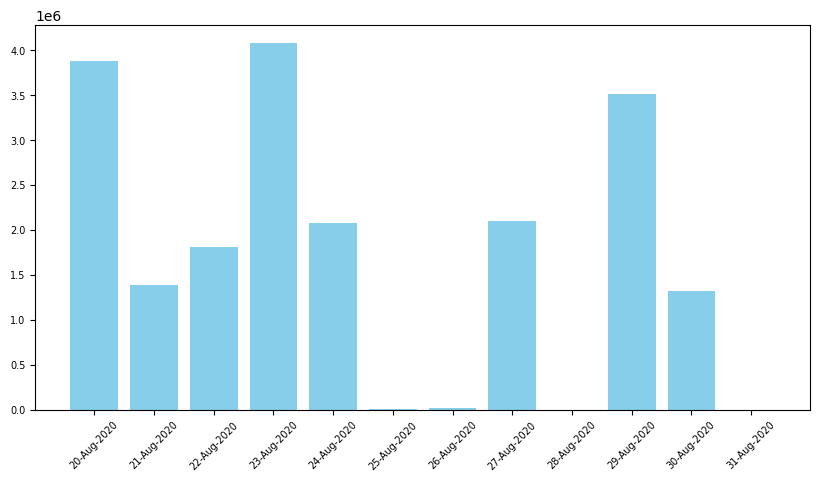

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(withdrawl_sum['Date'].dt.strftime('%d-%b-%Y'), withdrawl_sum['Deposits'], color='skyblue')
plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)
print(plt.yticks())